 <h1><center>Ad Click Prediction</center></h1>

# Introduction

The goal of the project is to __Predict who is likely going to click on the Ad__ on a website based on the features of a user. Following are the features involved in this dataset which is obtained from Kaggle.

|           Feature               |                  Description                           |
|---------------------------------|--------------------------------------------------------|
|1. __Daily Time Spent on a Site__   | Time spent by the user on a site in minutes.        |
|2. __Age__                          | Customer's age in terms of years.                   |
|3. __Area Income__                  | Average income of geographical area of consumer.    |
|4. __Daily Internet Usage__         | Avgerage minutes in a day consumer is on the internet.|
|5. __Ad Topic Line__                | Headline of the advertisement.                      | 
|6. __City__                         | City of the consumer.                               |
|7. __Male__                         | Whether or not a consumer was male.                 |
|8. __Country__                      | Country of the consumer.                            |
|9. __Timestamp__                    | Time at which user clicked on an Ad or the closed window.|
|10. __Clicked on Ad__               | 0 or 1 is indicated clicking on an Ad.              |



This notebook will contain exploratory data analysis along with classification models related to this project. 

Steps involved in this Notebook

- [Getting to know about the Data](#Examine-the-data)
- [Extract New features](#Extracting-Datetime-Variables)
- [Check distribution of target variable](#Visualize-Target-Variable )
- [Understand Relationship between variables](#Distribution-and-Relationship-Between-Variables)
- [Identifying Potential Outliers](#Identifying-Potential-Outliers-using-IQR)
- [Building a basic model](#Basic-model-building-based-on-the-actual-data)
- [feature engineering](#Feature-Engineering)
- [Building Logistic Regression Model](#Building-Logistic-Regression-Model )
- [Random Forest Model](#Random-Forest-Model)
- [Models Performances on Test Data](#Test-Models-Performance)
- [Feature Importances](#Random Forest Feature Importances)


# Load Libraries

In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings
import matplotlib.pyplot as plt
    # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline                    

# Load Data 

In [2]:
# Reading the file 
df = pd.read_csv("C:/Users/DELL/Desktop/codes/advertising/advertising.csv") 

# Examine the data

In [3]:
df.head(10) # Checking the 1st 10 rows of the data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


# Data type and length of the variables

In [4]:
df.info() # gives the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# Duplicates Checkup

In [5]:
df.duplicated().sum() # displays duplicate records

0

# Numerical and Categorical Variables Identification

In [6]:
df.columns # displays column names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.select_dtypes(include = ['object']).columns # Displays categorical variables which are detected by python 

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [8]:
# Assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [9]:
# Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

# Summarizing Numerical Variables

In [10]:
df[numeric_cols].describe()
# Decribe method is used to give statistical information on the numerical columns

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


As the __mean__ and __median__(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

# Summarizing Categorical Variables

In [11]:
df[Categorical_cols].describe(include = ['O'])
# Decribe method is used to give statistical information on the categorical columns

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Total asynchronous architecture,Williamsport,France
freq,1,3,9


As we have many different cities (__Unique__) and also not many people belonging to a same city(__freq__). So, it probably means that this feature is having no or very less predictive power. However we have less diversity with country feature so we have to further investigate it.

### Investing Country Variable

In [12]:
pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [13]:
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


It seems that users are from all over the world with maximum from france and czech republic with a count of 9 each.

# Check for Missing Values

In [14]:
df.isnull().sum() # Number of missing values in each column

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Extracting Datetime Variables

Utilizing timestamp feature to better understand the pattern when a user is clicking on a ad.

In [15]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month 
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day     
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour   
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [16]:
df.head() # verifying if the variables are added to our main data frame

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


# Visualize Target Variable 

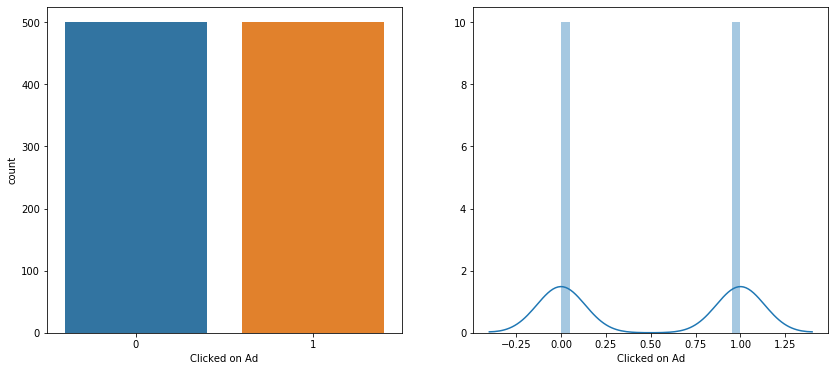

In [17]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20)
plt.show()

So from the plot we can see that the number of users who click on a ad and who do not are equal in numbers i.e 500,  that makes it very interesting.

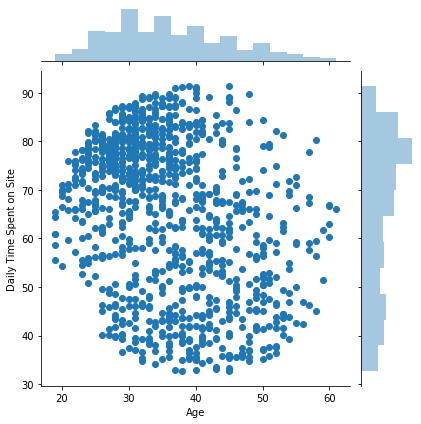

In [18]:
# Jointplot of daily time spent on site and age
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

We can see that more people aged between 30 to 40 are spending more time on site daily.

# Distribution and Relationship Between Variables 

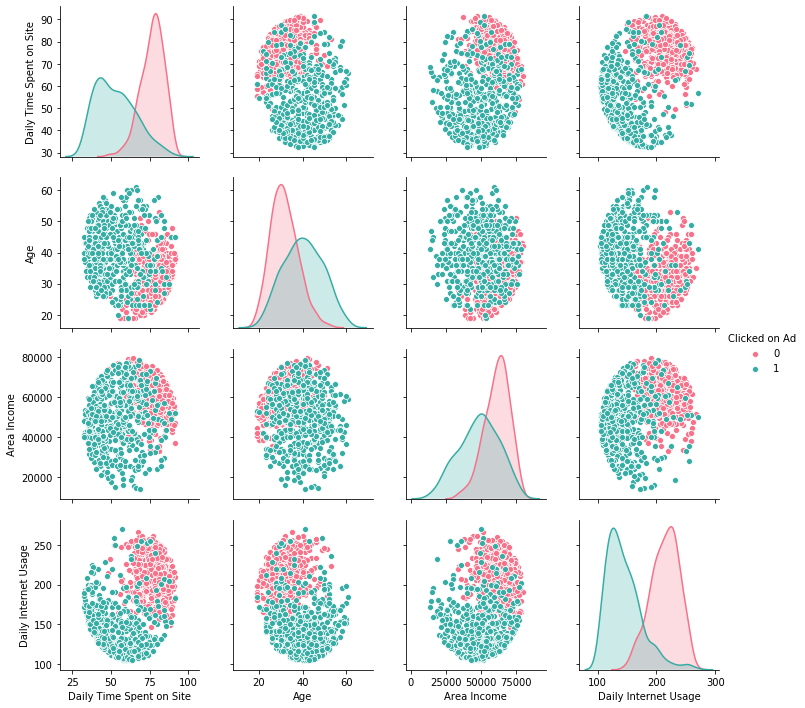

In [19]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'husl')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad. 

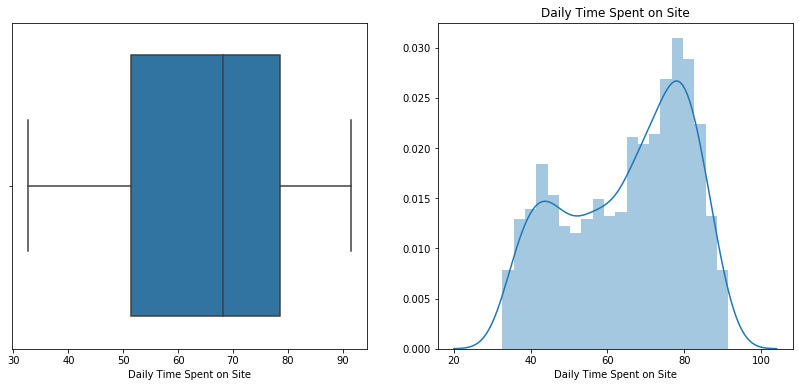

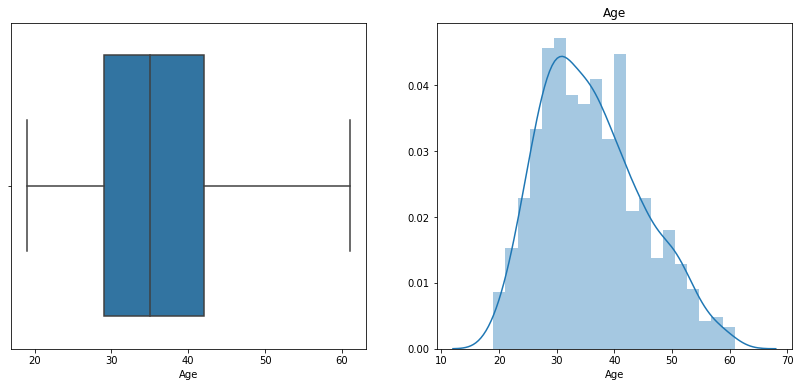

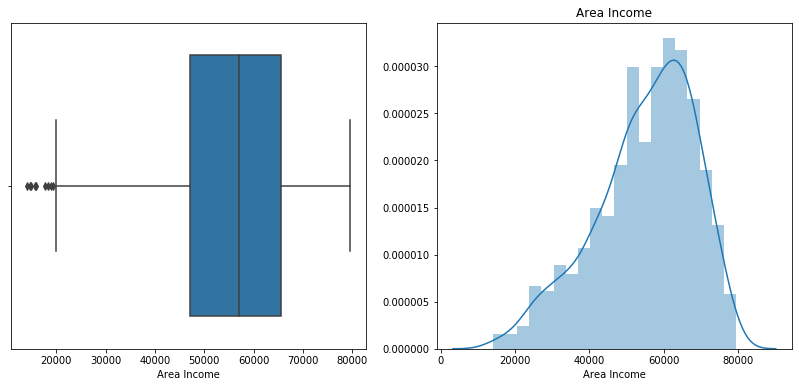

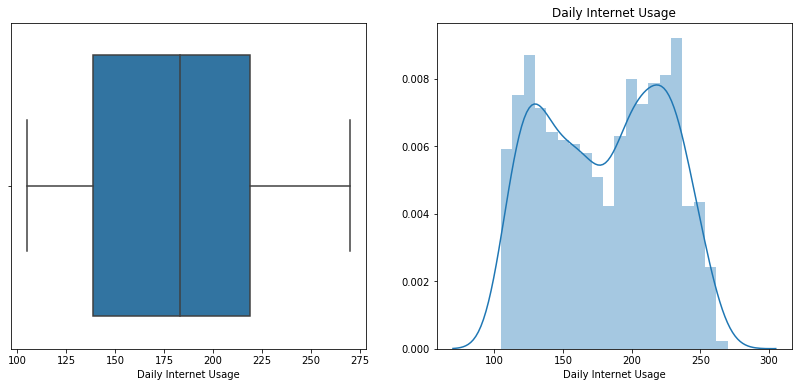

In [20]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20)    
    plt.title(i)    
    plt.show()

We can clearly see that daily interent usage and daily time spent on a site has 2 peaks (Bi-model in statistical terms). It indicates that there are two different groups present in our data. We dont expect the users to be normally distributed as there are people who spend more time on internet/website and people who spend less time. Some regularly use the website and some less often so they are perfectly alright.  

In [21]:
print('oldest person was of:', df['Age'].max(), 'Years')
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Average age was of:', df['Age'].mean(), 'Years')

oldest person was of: 61 Years
Youngest person was of: 19 Years
Average age was of: 36.009 Years


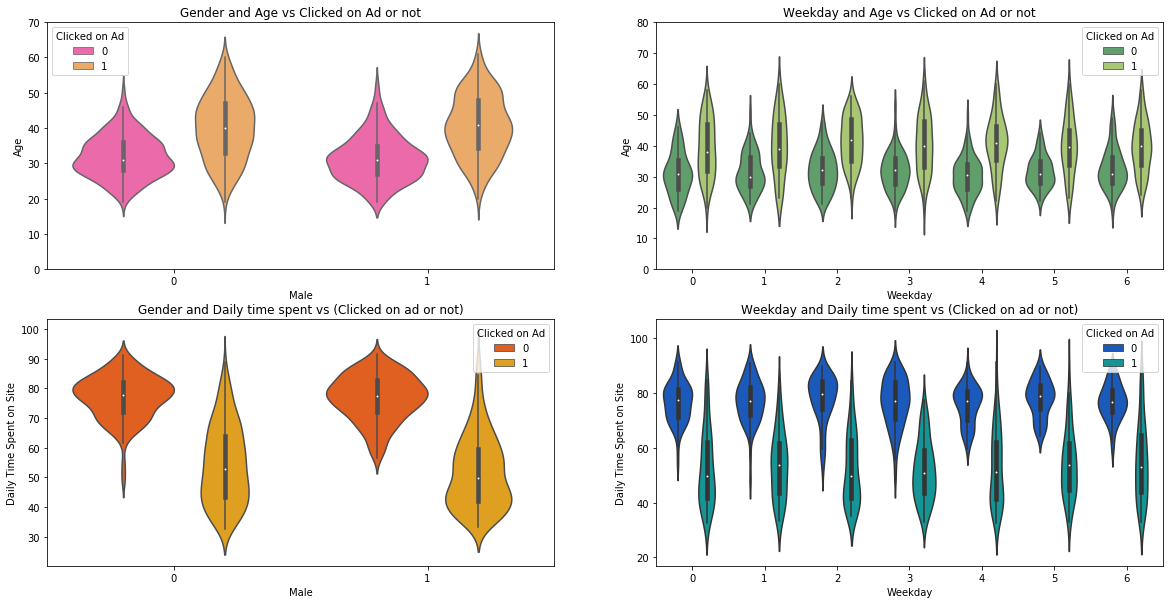

In [22]:
f,ax=plt.subplots(2,2, figsize=(20,10))
sns.violinplot("Male","Age", hue= "Clicked on Ad", data=df,ax=ax[0,0],palette="spring")
ax[0,0].set_title('Gender and Age vs Clicked on Ad or not')
ax[0,0].set_yticks(range(0,80,10))
sns.violinplot("Weekday","Age", hue="Clicked on Ad", data=df,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Weekday and Age vs Clicked on Ad or not')
ax[0,1].set_yticks(range(0,90,10))
sns.violinplot("Male","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('Gender and Daily time spent vs (Clicked on ad or not)')
#ax[1,0].set_yticks(range(0,120,10))
sns.violinplot("Weekday","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,1],palette="winter")
ax[1,1].set_title('Weekday and Daily time spent vs (Clicked on ad or not)')
#ax[1,1].set_yticks(range(0,120,10))
plt.show()

# Correlation Between Variables

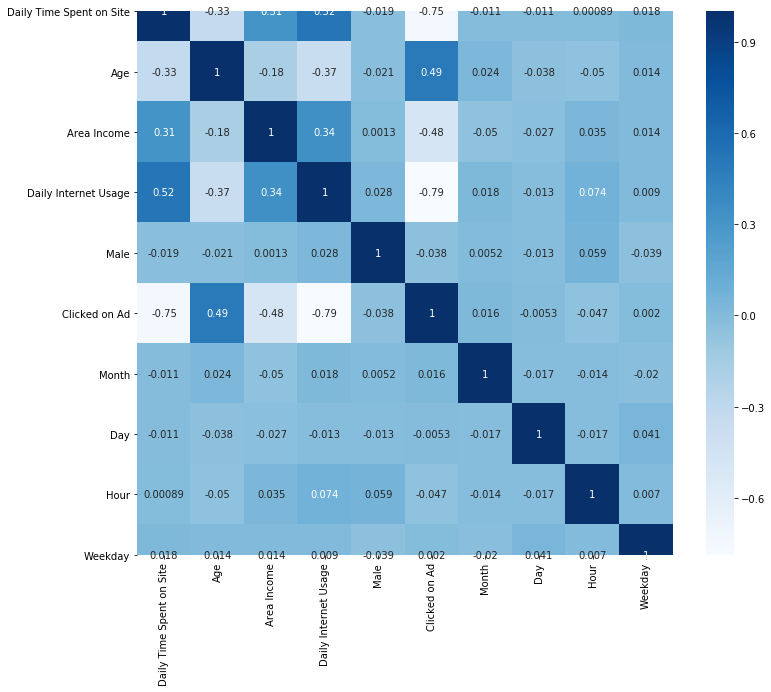

In [23]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

Heatmap gives us better understanding of relationship between each feature. Correlation is measured between __-1__ and __1__. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data. 

# Extracted Features Visualizations

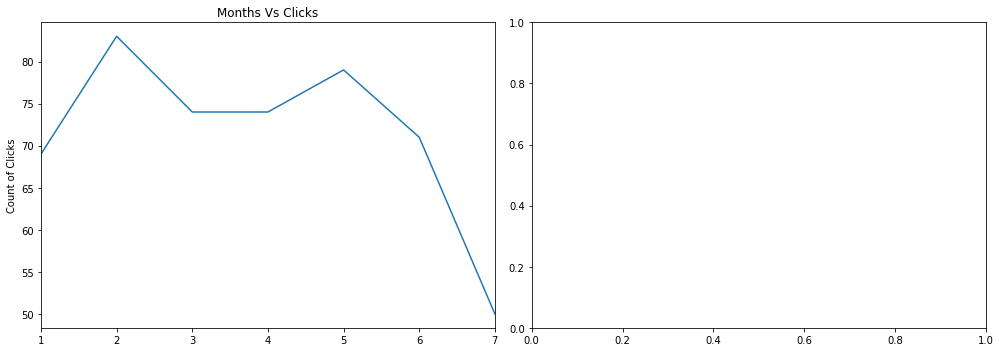

In [26]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"])
df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

Line chart showing the count of clicks for each month. Grouped bar chart shows distribution of target variable across 7 months. 2nd Month seems to be the best for clicking on a Ad.

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'Bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

Line chart here indicates that user tends to click on a Ad later in a day or probably early in the morning. It is expected based on the age feature that most people are working so it seems appropriate as they either find time early or late in the day. Also sunday seems to be effective for clicking on a ad from the bar chart.

## Clicked Vs Not Clicked

In [27]:
df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


Average profile of a user who will click on a ad or not.

In [28]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Distribution of clicks by gender. It seems that more number of females have clicked on ad.

In [29]:
hdf = pd.pivot_table(df, index = ['Hour'], columns = ['Male'], values = ['Clicked on Ad'], 
                     aggfunc= np.sum).rename(columns = {'Clicked on Ad':'Clicked'})

cm = sns.light_palette("green", as_cmap=True)
hdf.style.background_gradient(cmap=cm)  # Sums all 1's i.e clicked for each hour

Distribution by each hour and by gender. Overall females tend to click on a Ad more often than males.

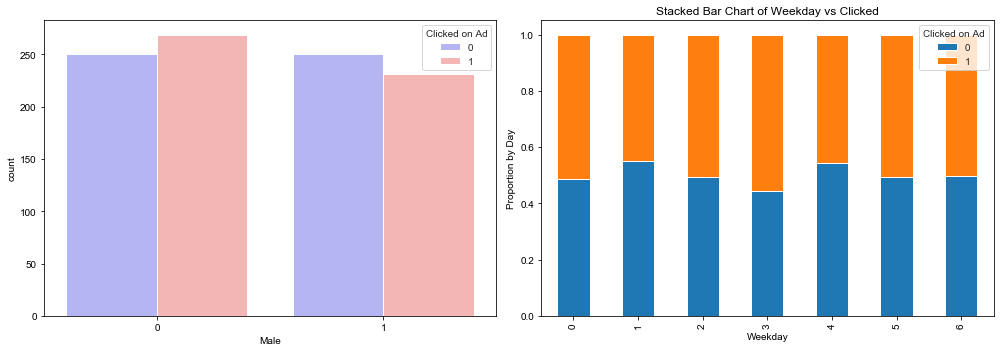

In [30]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='bwr', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(df['Weekday'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False) # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

From the stacked bar chart it seems that there more chances of user clicking on a ad if its a thursday!

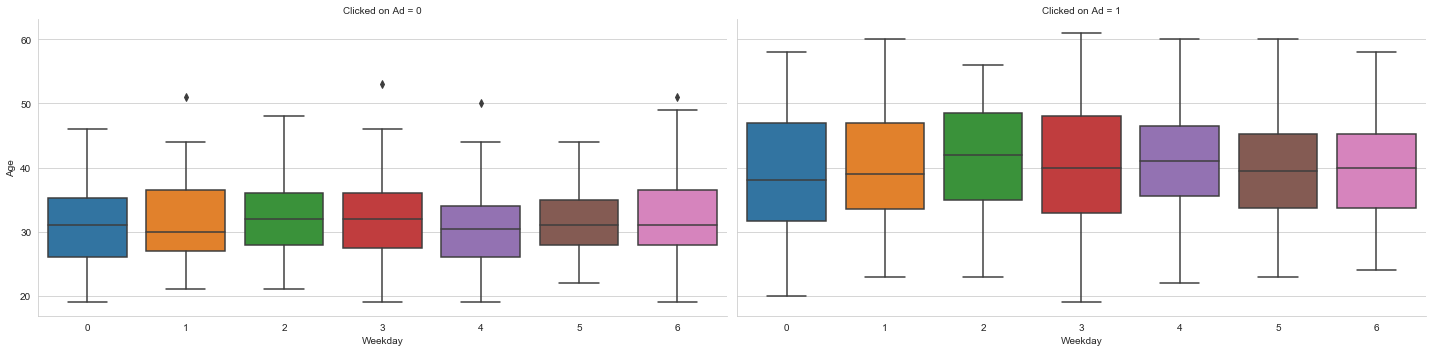

In [31]:
sns.factorplot(x="Weekday", y="Age", col="Clicked on Ad", data=df, kind="box",size=5, aspect=2.0) 

Comparison of users who have clicked on ad or not in terms of age and weekday. It is clear that people with higher age tend to click on a ad.

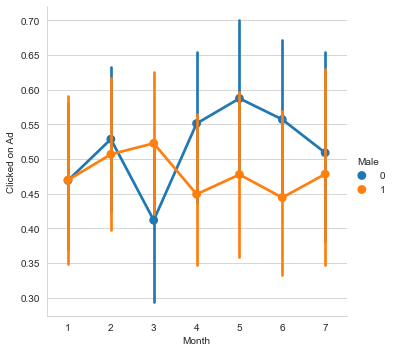

In [32]:
sns.factorplot('Month', 'Clicked on Ad', hue='Male', data = df)
plt.show()

# Identifying Potential Outliers using IQR

In [33]:
for i in numeric_cols:
    stat = df[i].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64
The upper and lower bounds for suspected outliers are 119.32875 and 10.57875.
count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64
The upper and lower bounds for suspected outliers are 61.5 and 9.5.
count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64
The upper and lower bounds for suspected outliers are 93128.88375000001 and 19373.553749999992.
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218

# Basic model building based on the actual data

In [34]:
# Importing train_test_split from sklearn.model_selection family
from sklearn.model_selection import train_test_split

In [35]:
# Assigning Numerical columns to X & y only as model can only take numbers
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [36]:
# Splitting the data into train & test sets 
# test_size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because 
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


# Building a Basic Model

In [37]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression

In [38]:
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()
# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

In [39]:
# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)
# Below are the results of predicted click on Ads
predictions[0:20]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

# Performance Metrics

Now we need to see how far our predictions met the actual test data (y_test) by performing evaluations using classification report & confusion matrix on the target variable and the predictions.

**confusion matrix** is used to evaluate the model behavior from a matrix. Below is how a confusion matrix looks like:

                    Predicted No   Predicted Yes
    Actual No          TN                 FP 

    Actual Yes         FN                 TP   

TP- True Positive 	TN- True Negative 
FP- False Positive 	FN- False Negative 

True Positive is the proportion of positives that are correctly identified. Similarly, True Negative is the proportion of negatives that are correctly identified. False Positive is the condition where we predict a result that is actually doesn't fulfill. Similarly, False Negative is the condition where the prediction failed, when it was actually successful.

If we want to calculate any specific value, we can do it from confusion matrix directly.

**classification_report** will basically tell us the precision, recall value's accuracy, f1 score & support. This way we don't have to read it ourself from a confusion matrix.

**precision** is the fraction of retrieved values that are relevant to the data. The precision is the ratio of tp / (tp + fp).

**recall** is the fraction of successfully retrieved values that are relevant to the data. The recall is the ratio of          tp / (tp + fn). 

**f1-score** is the harmonic mean of precision and recall. Where an fscore reaches its best value at 1 and worst score at 0.

**support** is the number of occurrences of each class in y_test.

In [40]:
# Importing classification_report from sklearn.metrics family
from sklearn.metrics import classification_report

# Printing classification_report to see the results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [41]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[156   6]
 [ 24 144]]


## Results for Basic Model

The results from evaluation are as follows:

**Confusion Matrix:** 

The users that are predicted to click on commercials and the actually clicked users were 144, the people who were predicted not to click on the commercials and actually did not click on them were 156.

The people who were predicted to click on commercial and actually did not click on them are 6, and the users who were not predicted to click on the commercials and actually clicked on them are 24.

We have only a few mislabelled points which is not bad from the given size of the dataset.

**Classification Report:**

From the report obtained, the precision & recall are 0.91 which depicts the predicted values are 91% accurate. Hence the probability that the user can click on the commercial is 0.91 which is a good precision value to get a good model.  

# Feature Engineering

In [42]:
new_df = df.copy() # just to keep the original dataframe unchanged

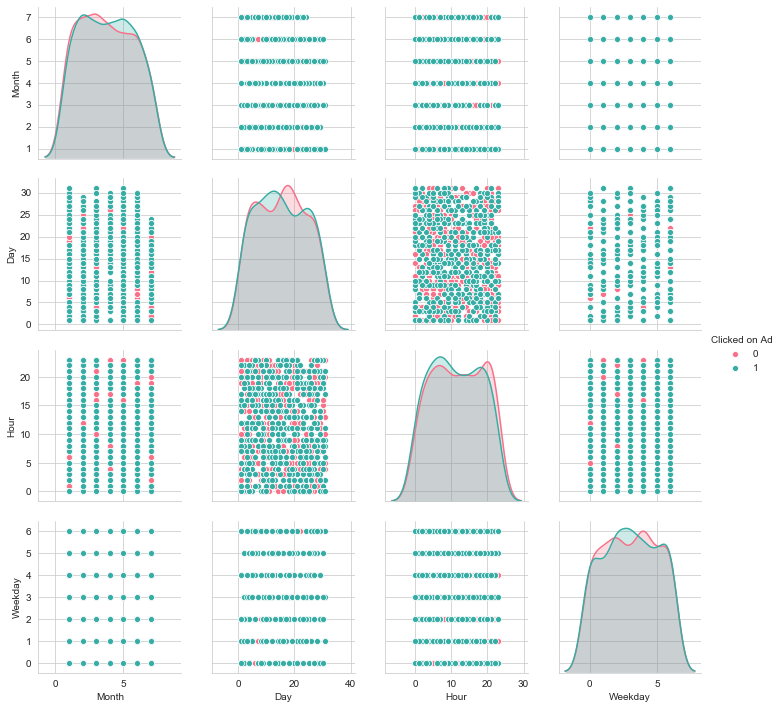

In [43]:
# Creating pairplot to check effect of datetime variables on target variable (variables which were created)
pp = sns.pairplot(new_df, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette= 'husl')

There dont seems to be any effect of month, day, weekday and hour on the target variable. 

In [44]:
# Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Month'], prefix='Month')], axis=1) 
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Weekday'], prefix='Weekday')], axis=1)

In [45]:
# Creating buckets for hour columns based on EDA part
new_df['Hour_bins'] = pd.cut(new_df['Hour'], bins = [0, 5, 11, 17, 23], 
                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [46]:
# Dummy encoding on Hour_bins column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

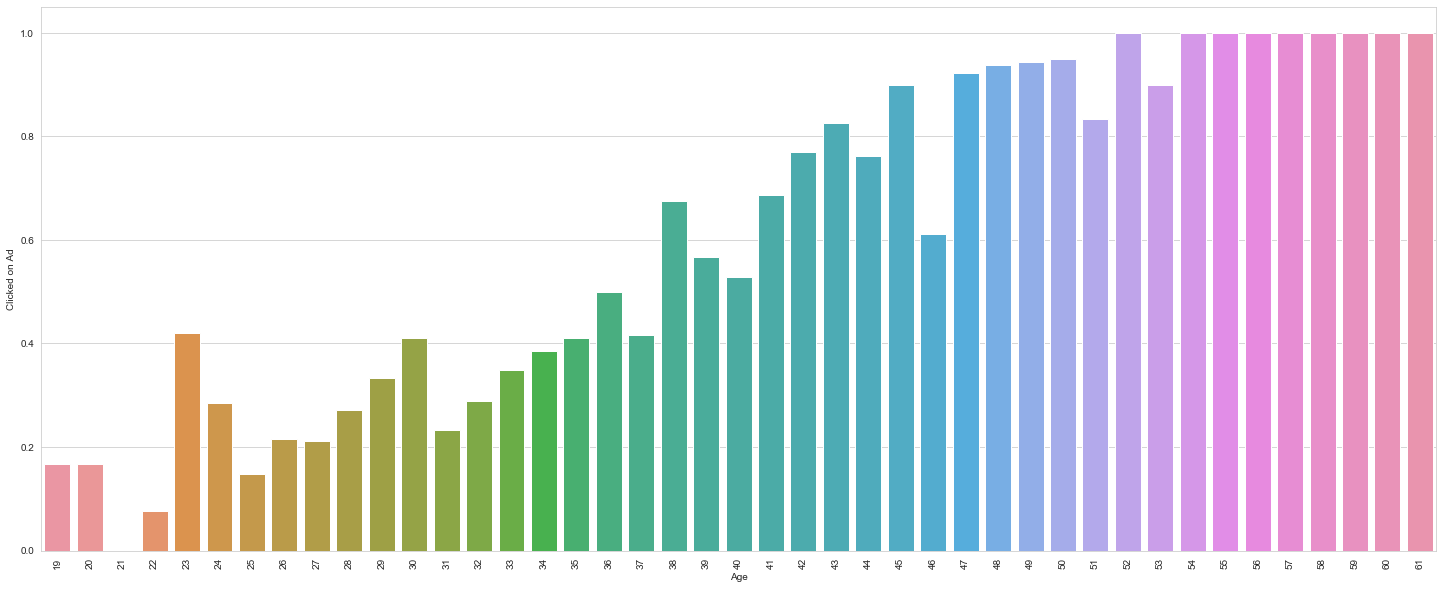

In [47]:
# Feature engineering on Age column
plt.figure(figsize=(25,10))
sns.barplot(new_df['Age'],df['Clicked on Ad'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

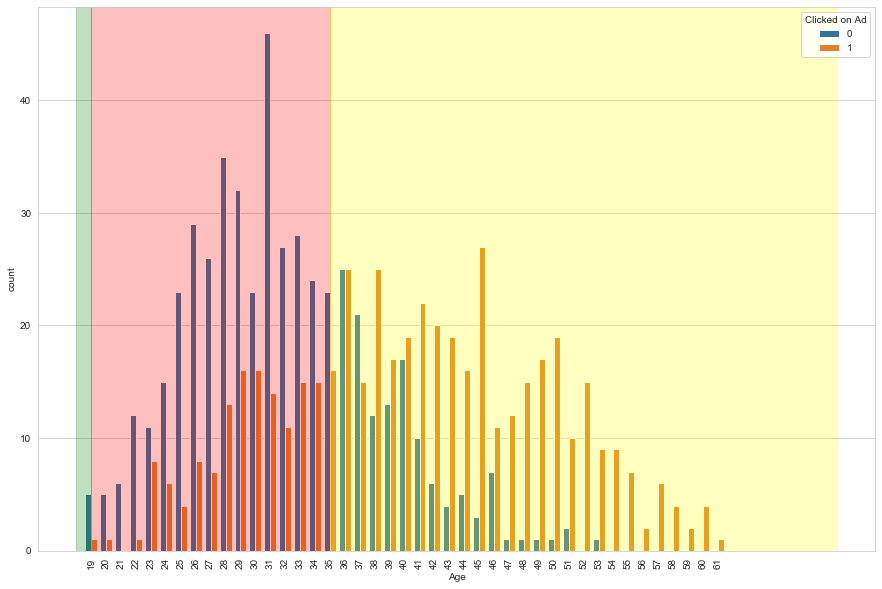

In [48]:
# checking bins
limit_1 = 18
limit_2 = 35

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(15,10))
#sns.barplot(df['age'],df['survival_7_years'], ci=None)
sns.countplot('Age',hue='Clicked on Ad',data=df)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 50, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [49]:
# Creating Bins on Age column based on above plots
new_df['Age_bins'] = pd.cut(new_df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

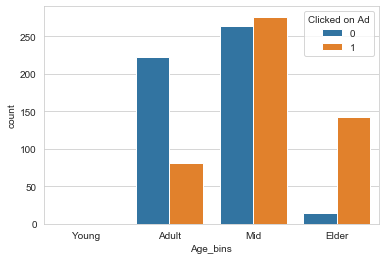

In [50]:
sns.countplot('Age_bins',hue='Clicked on Ad',data= new_df) # Verifying the bins by checking the count

In [51]:
# Dummy encoding on Age column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Age_bins'], prefix='Age')], axis=1) 

In [52]:
# Dummy encoding on Column column based on EDA
new_df = pd.concat([new_df, pd.get_dummies(new_df['Country'], prefix='Country')], axis=1)

In [53]:
# Remove redundant and no predictive power features
new_df.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday', 
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)
new_df.head() # Checking the final dataframe

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month_1,Month_2,Month_3,Month_4,Month_5,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,61833.90,256.09,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Logistic Regression Model

In [54]:
X = new_df.drop(['Clicked on Ad'],1)
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 263) (800,)
(200, 263) (200,)


In [56]:
import  statsmodels.api  as sm
from scipy import stats

X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     17.75
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          8.68e-164
Time:                        01:57:14   Log-Likelihood:                 314.62
No. Observations:                 800   AIC:                            -115.2
Df Residuals:                     543   BIC:                             1089.
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4863      0.007     69.390      0.0

We can see that the feature __Male(Gender)__ does not contribute to the model (i.e., see x4) so we can actually remove that variable from our model. After removing the variable if the __Adjusted R-squared has not changed__ from the previous model. Then we could conclude that the feature indeed was not contributing to the model. Looks like the contributing features for the model are:

- Daily Time Spent on site
- Daily Internet Usage
- Age
- Country
- Area income

In [57]:
# Applying logistic regression model to training data
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)
# Predict using model
lr_training_pred = lr.predict(X_train_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))

Accuracy of Logistic regression training set: 0.992


In [58]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.954 +/- 0.021


The cross validated score for Logistic Regression Classifier is: 95.38


Text(0.5, 1.05, 'Confusion_matrix')

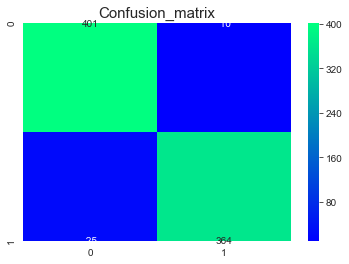

In [59]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Logistic Regression Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(lr,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train_std,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)

print("Accuracy of Random Forest training set:",   round(rf_training_prediction,3))

Accuracy of Random Forest training set: 0.994


In [61]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.966 +/- 0.013


The cross validated score for Random Forest Classifier is: 96.62


Text(0.5, 1.05, 'Confusion_matrix')

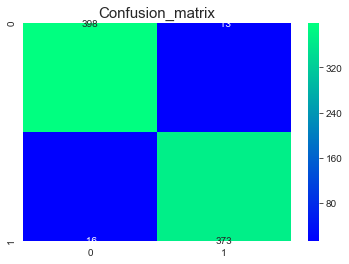

In [62]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Random Forest Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(rf,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

# Test Models Performance

In [63]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test_std))

print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test_std)))

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_std))

print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_std)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.91
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        89
           1       0.97      0.86      0.91       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



 ---Random Forest Model---
Random Forest AUC = 0.94
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        89
           1       0.94      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



We can observe that random forest has higher accuracy compared to logistic regression model in both test and train data sets.

# ROC Graph

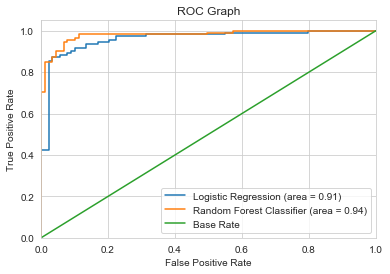

In [64]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_std)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_std)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Random Forest Feature Importances

In [65]:
columns = X.columns
train = pd.DataFrame(np.atleast_2d(X_train_std), columns=columns) # Converting numpy array list into dataframes

In [66]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.363155
1,Daily Time Spent on Site,0.283201
2,Area Income,0.113893
3,Age_Elder,0.039546
4,Age_Adult,0.028179
5,Age_Mid,0.008104
6,Country_Hungary,0.003655
7,Male,0.003080
8,Hour_Hour_6-11,0.003060
9,Country_Australia,0.002839


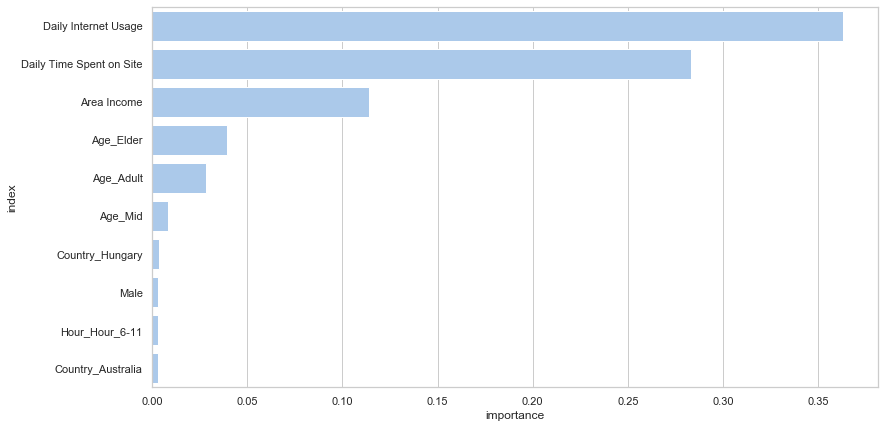

In [67]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[0:10],
            label="Total", color="b")

In [ ]:
-